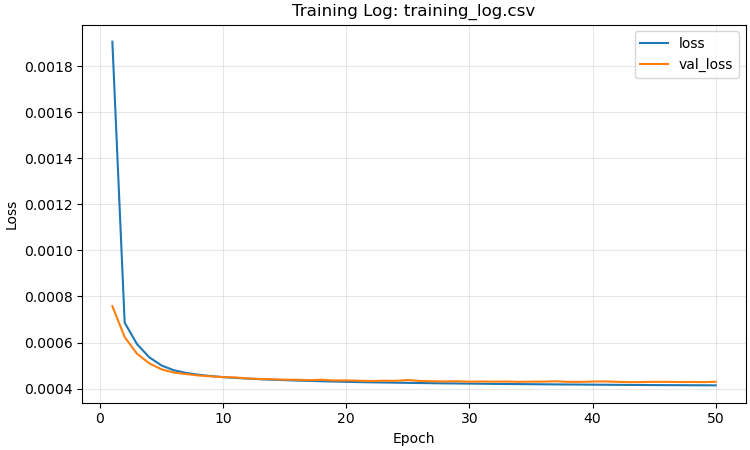

In [1]:
# Minimal interactive loss plot (training vs validation)
# Requires: numpy, matplotlib, ipympl (your env already has these)

import os, csv
import numpy as np
import matplotlib.pyplot as plt

# Use the interactive backend so you can pan/zoom in JupyterLab
try:
    from IPython import get_ipython
    ip = get_ipython()
    if ip is not None:
        ip.run_line_magic("matplotlib", "widget")
except Exception:
    pass

# Update if needed
LOG_PATH = r"D:/Results/09052025_AE1M_Conv2DTranspose/training_log.csv"

def load_log(path):
    if not os.path.isfile(path):
        raise FileNotFoundError(f"Not found: {path}")

    with open(path, "r", newline="") as f:
        reader = csv.DictReader(f)
        rows = list(reader)

    if not rows:
        raise ValueError("CSV is empty.")

    # Helper to safely pull a float column
    def col(name):
        if name not in reader.fieldnames:
            return None
        vals = []
        for r in rows:
            v = r.get(name, "")
            try:
                vals.append(float(v))
            except Exception:
                vals.append(np.nan)
        return np.asarray(vals, dtype=float)

    epoch = col("epoch")
    epochs = (epoch.astype(int) + 1) if epoch is not None else np.arange(1, len(rows) + 1)

    loss = col("loss")
    val_loss = col("val_loss")

    return epochs, loss, val_loss

epochs, loss, val_loss = load_log(LOG_PATH)

fig, ax = plt.subplots(figsize=(7.5, 4.5), constrained_layout=True)
if loss is not None:
    ax.plot(epochs, loss, label="loss")
if val_loss is not None:
    ax.plot(epochs, val_loss, label="val_loss")

ax.set_title(f"Training Log: {os.path.basename(LOG_PATH)}")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid(True, alpha=0.3)
ax.legend()
fig.canvas.toolbar_visible = True
fig.canvas.header_visible = False
fig.canvas.footer_visible = False




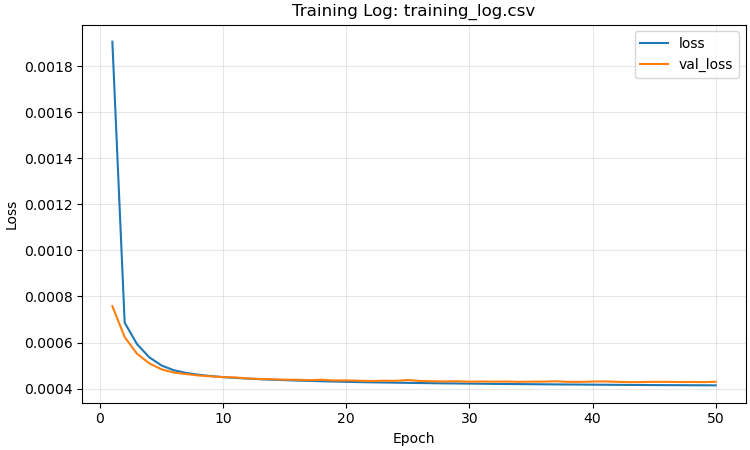

In [2]:
#| label: fig:ae1m-loss-plot
#| caption: "."

plt.show()